In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dbfread

In [3]:
dbf = dbfread.DBF('../Datasets/taxi_zones.dbf')

In [4]:
df = pd.DataFrame(dbf)

In [5]:
df.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
0,1,0.116357,0.000782,Newark Airport,1,EWR
1,2,0.433470,0.004866,Jamaica Bay,2,Queens
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx
3,4,0.043567,0.000112,Alphabet City,4,Manhattan
4,5,0.092146,0.000498,Arden Heights,5,Staten Island


In [8]:
df

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
0,1,0.116357,0.000782,Newark Airport,1,EWR
1,2,0.433470,0.004866,Jamaica Bay,2,Queens
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx
3,4,0.043567,0.000112,Alphabet City,4,Manhattan
4,5,0.092146,0.000498,Arden Heights,5,Staten Island
...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx
259,260,0.133514,0.000422,Woodside,260,Queens
260,261,0.027120,0.000034,World Trade Center,261,Manhattan
261,262,0.049064,0.000122,Yorkville East,262,Manhattan


In [9]:
df.shape

(263, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    263 non-null    int64  
 1   Shape_Leng  263 non-null    float64
 2   Shape_Area  263 non-null    float64
 3   zone        263 non-null    object 
 4   LocationID  263 non-null    int64  
 5   borough     263 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 12.5+ KB


In [11]:
df.describe()

,OBJECTID,Shape_Leng,Shape_Area,LocationID
count,263.000000,263.000000,263.000000,263.000000
mean,132.000000,0.094269,0.000402,131.984791
std,76.065761,0.054594,0.000482,76.073787
min,1.000000,0.014306,0.000006,1.000000
25%,66.500000,0.054722,0.000133,66.500000
50%,132.000000,0.084341,0.000268,132.000000
75%,197.500000,0.119488,0.000480,197.500000
max,263.000000,0.433470,0.004866,263.000000


In [12]:
# Obtener el conteo de nulos por columna de df
null_count = df.isnull().sum()

# Obtener el porcentaje de nulos por columna
null_percentage = (df.isnull().mean()) * 100

# Crear un nuevo DataFrame con la información de conteo y porcentaje
null_info = pd.DataFrame({
    'Nulos': null_count,
    'Porcentaje': null_percentage
})

# Imprimir el nuevo DataFrame
print(null_info)

            Nulos  Porcentaje
OBJECTID        0         0.0
Shape_Leng      0         0.0
Shape_Area      0         0.0
zone            0         0.0
LocationID      0         0.0
borough         0         0.0


No existen datos nulos en el dataset

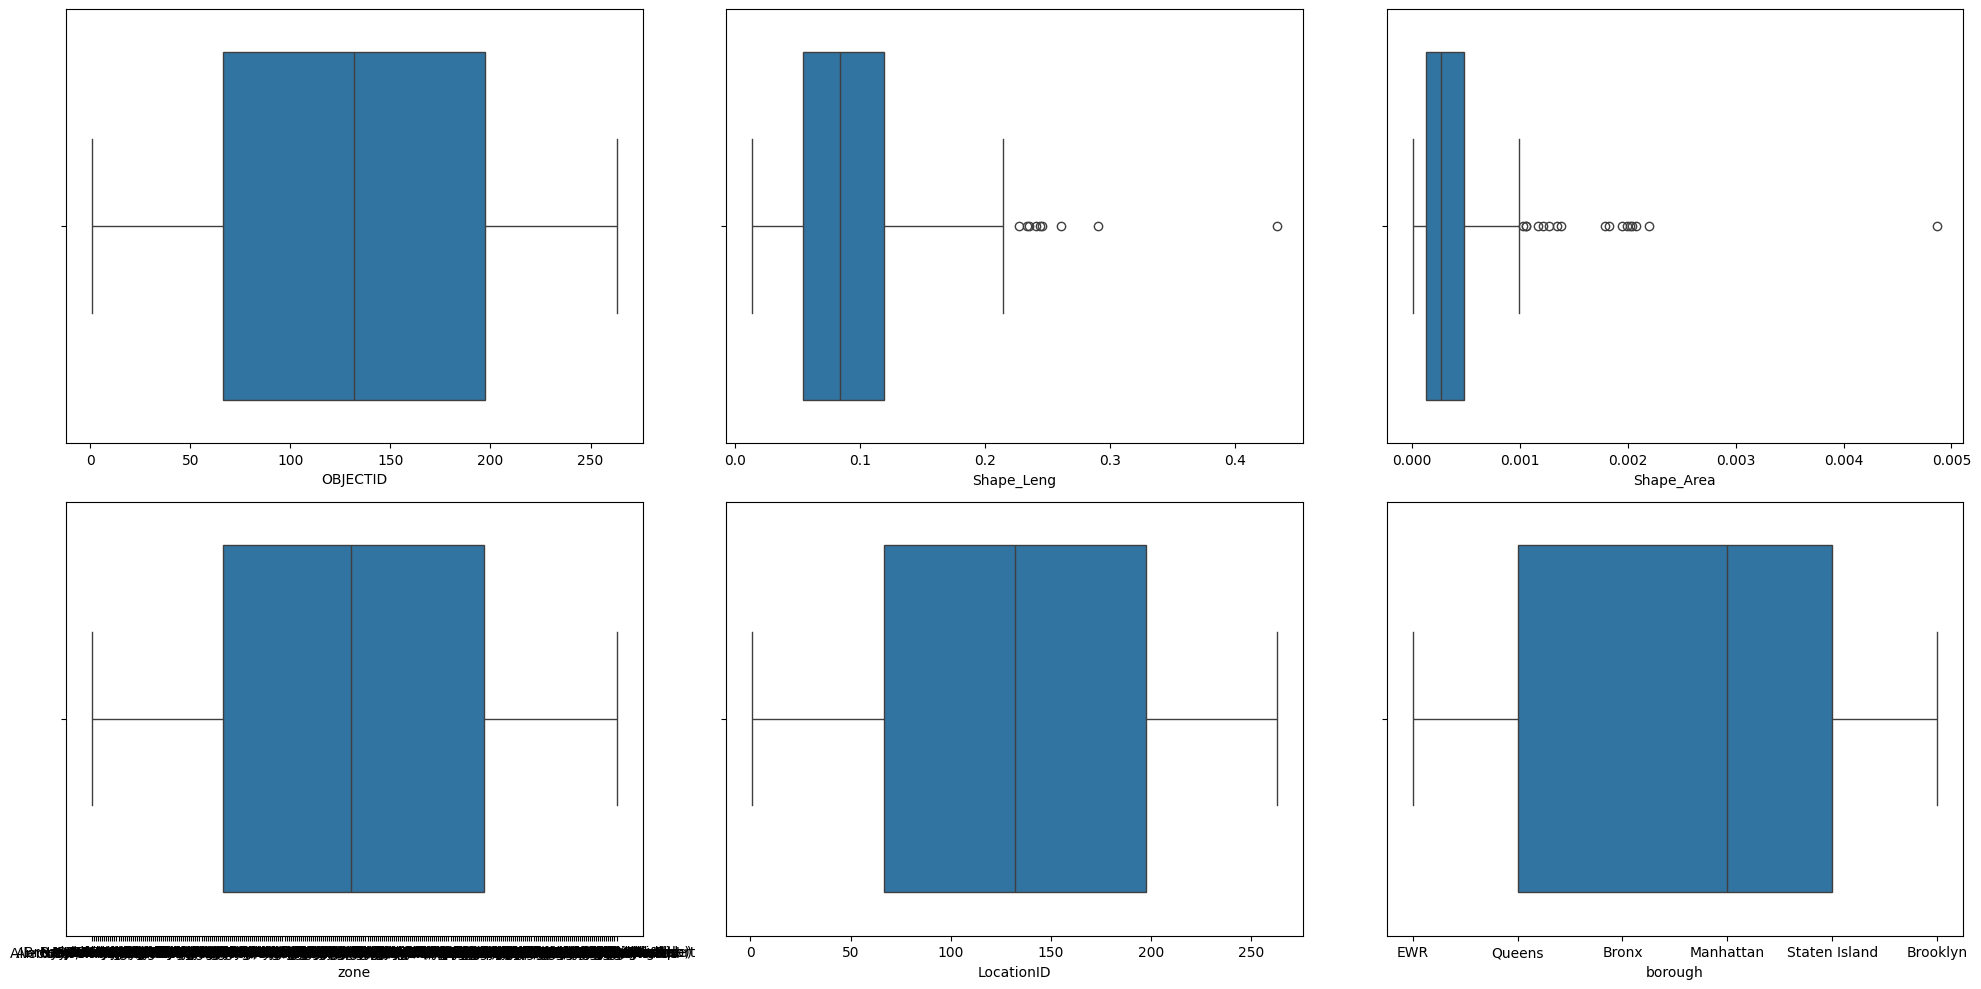

In [15]:
# Configurar la figura con X columnas y Y filas
fig, axes = plt.subplots(2, 3, figsize=(20, 10))


# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Crear un boxplot para cada variable
for i, col in enumerate(df.columns[:6]):  # Asegúrate de tener  columnas
    sns.boxplot(data=df, x=col, ax=axes[i])
    # axes[i].set_title(col)

# Ajustar el layout para evitar solapamiento
plt.tight_layout()

# Mostrar el gráfico
plt.show()

se pueden notar como en las columnas shape_leng existen outliers, en shape area tambien, sin embargo son datos que no se pueden cambiar puesto que pertenecen a observaciones de las zonas de taxis

---
Funciones para graficar
---
---

In [16]:
def graficar_conteo(colum):
    ret = df[colum].unique()
    if (len(df[colum].unique()) > 30):
        top_30 = df[colum].value_counts().nlargest(30)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_30.index, y=top_30.values, palette="bright")
        plt.xlabel(colum)
        plt.ylabel('Frecuencia')
        plt.title(f'Top 30 {colum} vehiculos')
        plt.xticks(rotation=90) 
        plt.tight_layout()
        plt.show()
        return top_30
    else:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=df[colum], palette='bright')
        plt.xlabel(colum)
        plt.ylabel('Frecuencia')
        plt.title(f'{colum}')
        plt.xticks(rotation=90) 
        plt.show()
        return df[colum].value_counts()

---
EDA completo
---
---

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15836\3066805743.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


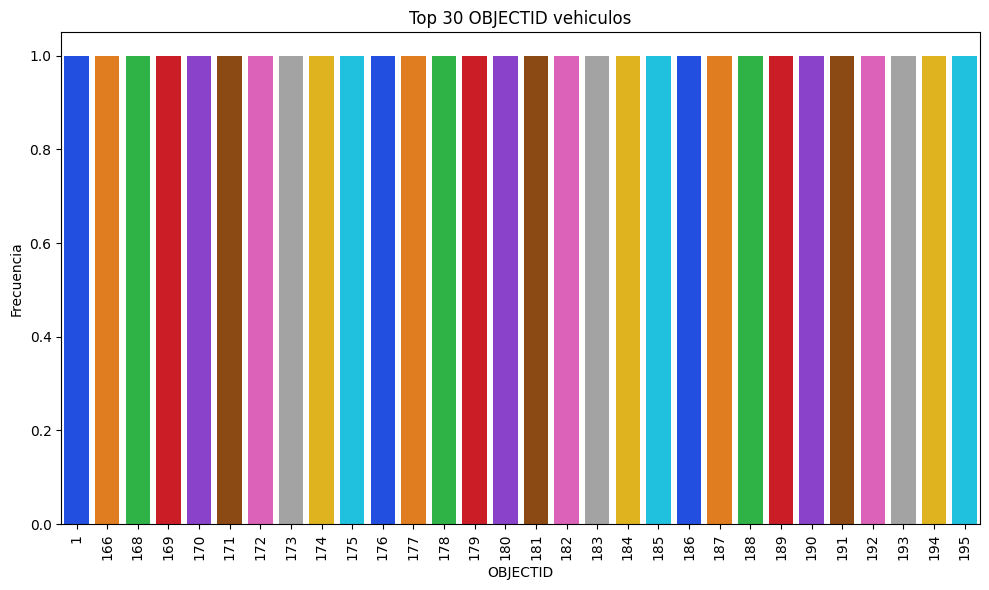

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15836\3066805743.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


OBJECTID
1      1
166    1
168    1
169    1
170    1
171    1
172    1
173    1
174    1
175    1
176    1
177    1
178    1
179    1
180    1
181    1
182    1
183    1
184    1
185    1
186    1
187    1
188    1
189    1
190    1
191    1
192    1
193    1
194    1
195    1
Name: count, dtype: int64


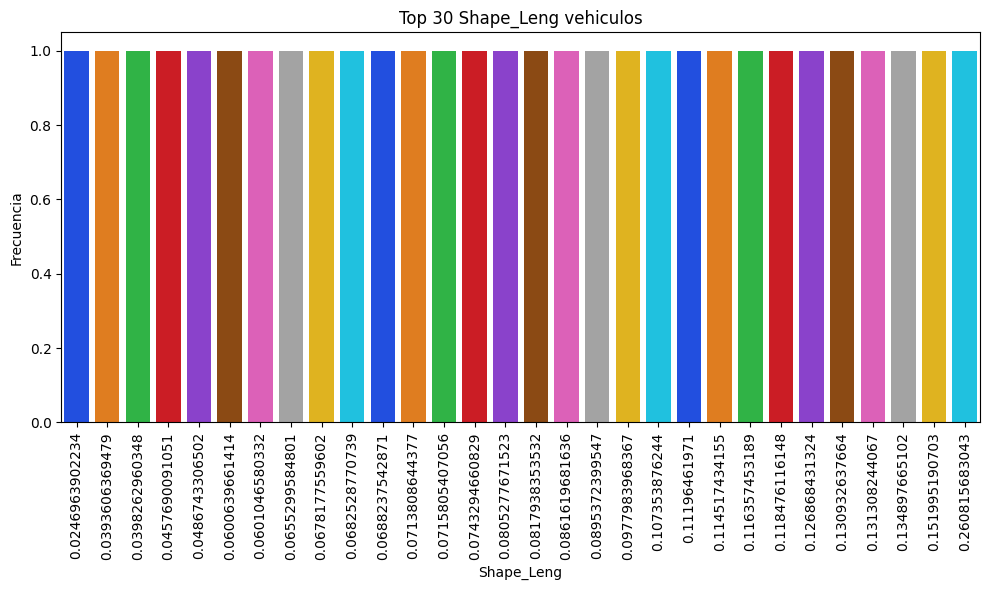

Shape_Leng
0.116357    1
0.068824    1
0.114517    1
0.060105    1
0.045769    1
0.107354    1
0.118476    1
0.060064    1
0.067818    1
0.134898    1
0.151995    1
0.071581    1
0.068253    1
0.071381    1
0.080528    1
0.089537    1
0.039361    1
0.039826    1
0.260816    1
0.086162    1
0.024696    1
0.126868    1
0.097798    1
0.048674    1
0.074329    1
0.130933    1
0.111965    1
0.065530    1
0.081794    1
0.131308    1
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_15836\3066805743.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


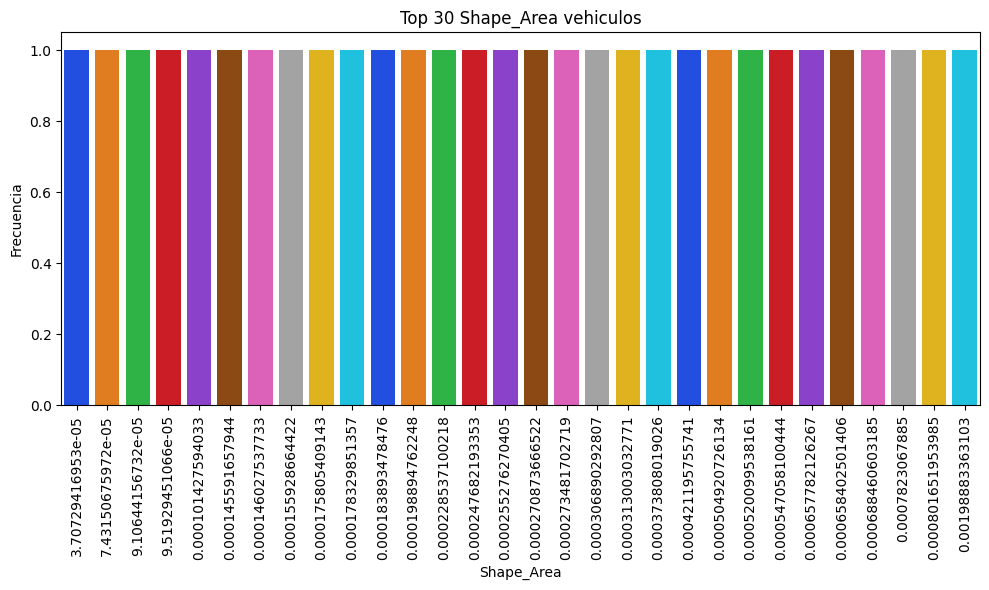

Shape_Area
0.000782    1
0.000255    1
0.000547    1
0.000146    1
0.000074    1
0.000520    1
0.000658    1
0.000178    1
0.000156    1
0.000505    1
0.000658    1
0.000199    1
0.000176    1
0.000184    1
0.000248    1
0.000307    1
0.000091    1
0.000095    1
0.001989    1
0.000229    1
0.000037    1
0.000421    1
0.000313    1
0.000101    1
0.000271    1
0.000688    1
0.000374    1
0.000146    1
0.000273    1
0.000802    1
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_15836\3066805743.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


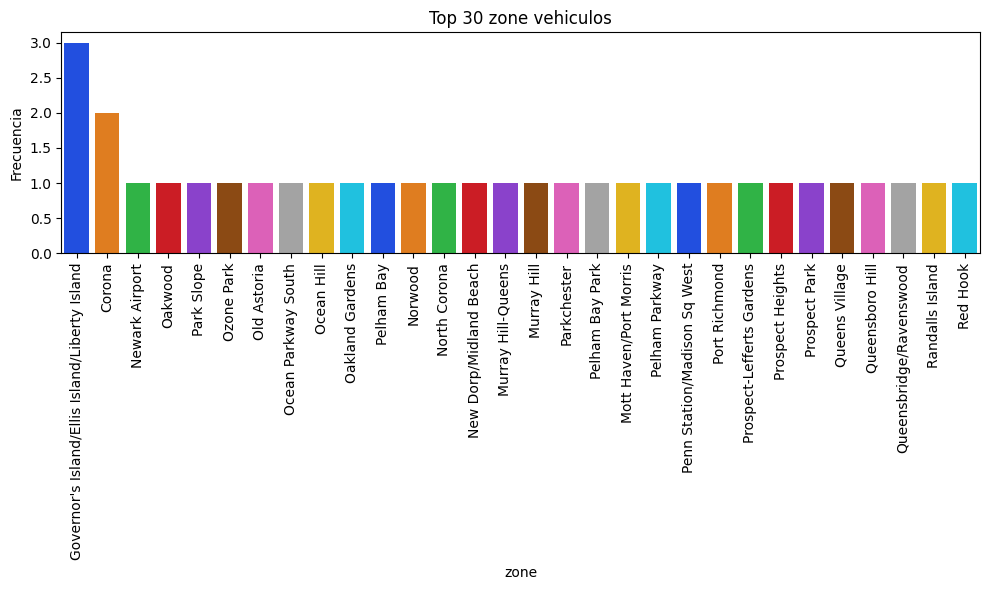

zone
Governor's Island/Ellis Island/Liberty Island    3
Corona                                           2
Newark Airport                                   1
Oakwood                                          1
Park Slope                                       1
Ozone Park                                       1
Old Astoria                                      1
Ocean Parkway South                              1
Ocean Hill                                       1
Oakland Gardens                                  1
Pelham Bay                                       1
Norwood                                          1
North Corona                                     1
New Dorp/Midland Beach                           1
Murray Hill-Queens                               1
Murray Hill                                      1
Parkchester                                      1
Pelham Bay Park                                  1
Mott Haven/Port Morris                           1
Pelham Parkway            

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15836\3066805743.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


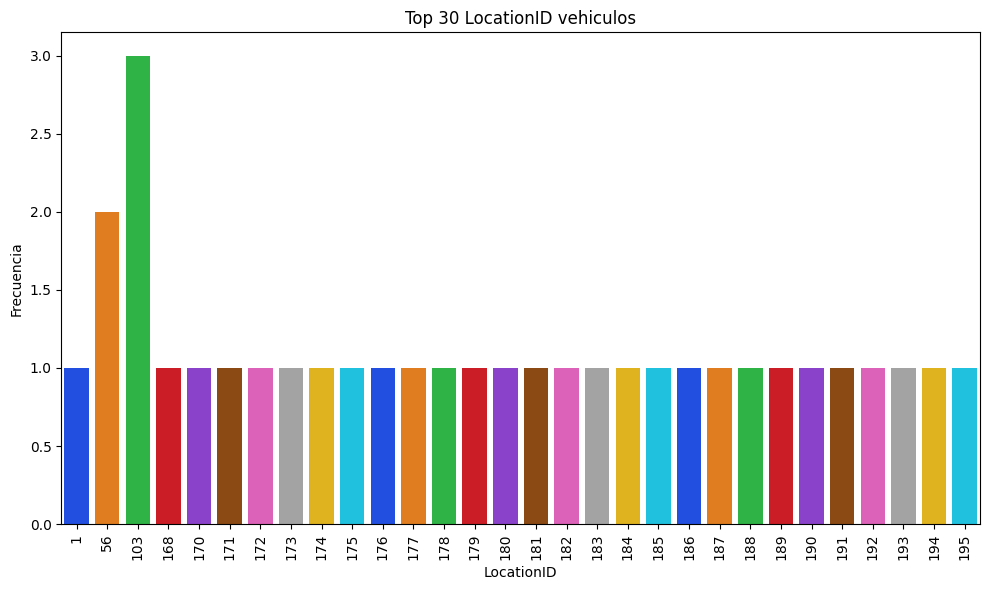

LocationID
103    3
56     2
1      1
176    1
181    1
180    1
179    1
178    1
177    1
175    1
183    1
174    1
173    1
172    1
171    1
170    1
182    1
184    1
168    1
185    1
186    1
187    1
188    1
189    1
190    1
191    1
192    1
193    1
194    1
195    1
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_15836\3066805743.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


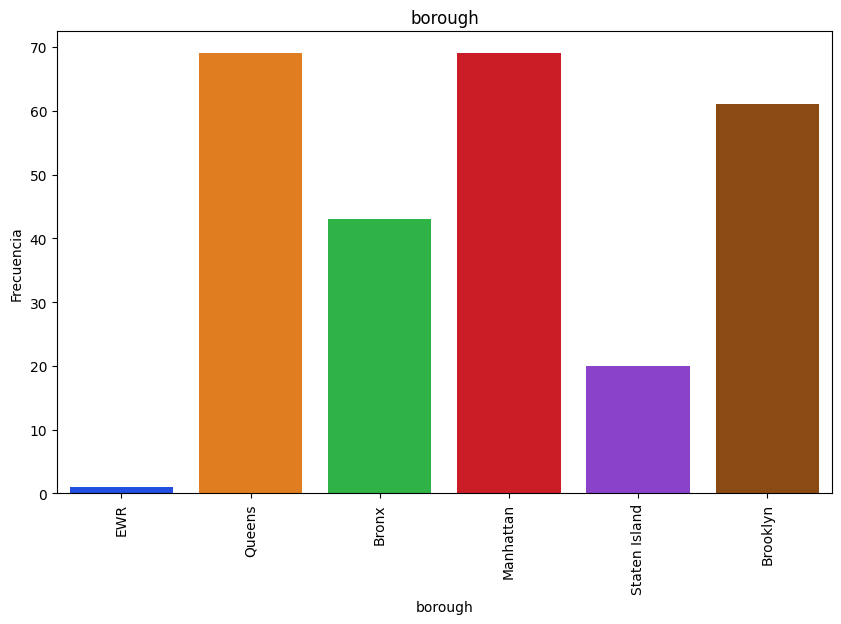

borough
Queens           69
Manhattan        69
Brooklyn         61
Bronx            43
Staten Island    20
EWR               1
Name: count, dtype: int64


In [17]:
for colum in df.columns:
    print(graficar_conteo(colum))

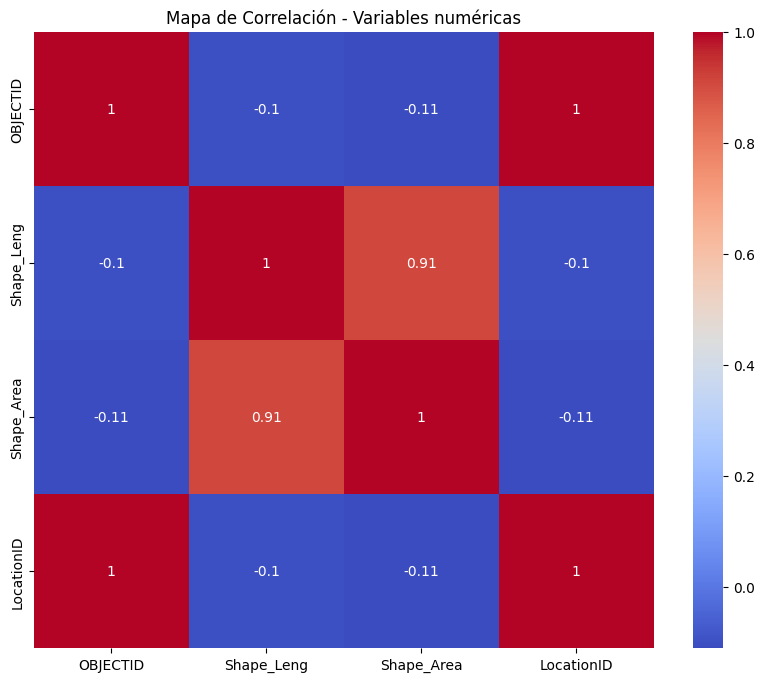

In [9]:
# Generamos un mapa de calor con las correlaciones de los todos los datos que contengan números 
dataNumerica = df.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title('Mapa de Correlación - Variables numéricas')
plt.show()

In [10]:
df.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID',
       'borough'],
      dtype='object')

---
'Shape_Leng' - Esta columna contiene información sobre la longitud de los viajes o rutas de trayectoria en una zona determinada
---
---

In [14]:
df['Shape_Leng'].max()

0.43346966679

In [18]:
viajes_mas_largos = df.nlargest(30, 'Shape_Leng')
viajes_mas_largos = df.nsmallest(30, 'Shape_Leng')
viajes_mas_largos = df.sort_values('Shape_Leng', ascending=False).head(30)
viajes_mas_cortos = df.sort_values('Shape_Leng', ascending=True).head(30)

In [20]:
viajes_mas_cortos

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
102,103,0.014306,0.000006,Governor's Island/Ellis Island/Liberty Island,103,Manhattan
56,57,0.019271,0.000018,Corona,56,Queens
103,104,0.021221,0.000012,Governor's Island/Ellis Island/Liberty Island,103,Manhattan
185,186,0.024696,0.000037,Penn Station/Madison Sq West,186,Manhattan
152,153,0.024737,0.000032,Marble Hill,153,Manhattan
99,100,0.024813,0.000037,Garment District,100,Manhattan
210,211,0.025235,0.000040,SoHo,211,Manhattan
260,261,0.027120,0.000034,World Trade Center,261,Manhattan
7,8,0.027591,0.000027,Astoria Park,8,Queens
143,144,0.027620,0.000047,Little Italy/NoLiTa,144,Manhattan


In [23]:
viajes_mas_largos

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
1,2,0.433470,0.004866,Jamaica Bay,2,Queens
22,23,0.290556,0.002196,Bloomfield/Emerson Hill,23,Staten Island
183,184,0.260816,0.001989,Pelham Bay Park,184,Bronx
131,132,0.245479,0.002038,JFK Airport,132,Queens
117,118,0.243966,0.001827,Heartland Village/Todt Hill,118,Staten Island
75,76,0.241203,0.001267,East New York,76,Brooklyn
43,44,0.235689,0.001945,Charleston/Tottenville,44,Staten Island
83,84,0.233624,0.002074,Eltingville/Annadale/Prince's Bay,84,Staten Island
153,154,0.227332,0.001790,Marine Park/Floyd Bennett Field,154,Brooklyn
207,208,0.214721,0.002020,Schuylerville/Edgewater Park,208,Bronx


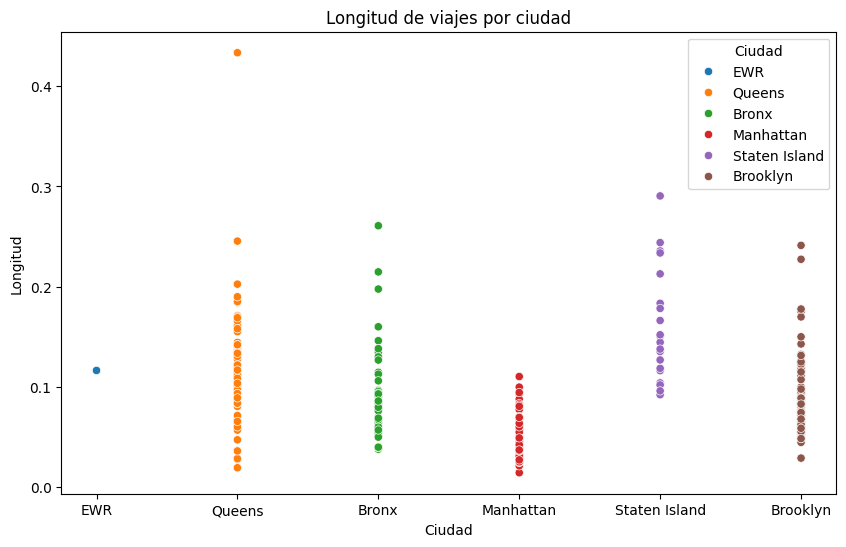

In [49]:
viajes = pd.concat([viajes_mas_largos, viajes_mas_cortos])
plt.figure(figsize=(10,6))
sns.scatterplot(x='borough', y='Shape_Leng', hue='borough', data=df)
plt.title('Longitud de viajes por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Longitud')
plt.legend(title='Ciudad')
plt.show()


En su mayoría
- Los viajes mas cortos se dan en Manhatan 
- Mientras que los mas largos suceden en Staten Island y Queeens

---
Shape Area
---
---

In [38]:
df.nlargest(30, 'Shape_Area')

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
1,2,0.433470,0.004866,Jamaica Bay,2,Queens
22,23,0.290556,0.002196,Bloomfield/Emerson Hill,23,Staten Island
83,84,0.233624,0.002074,Eltingville/Annadale/Prince's Bay,84,Staten Island
131,132,0.245479,0.002038,JFK Airport,132,Queens
207,208,0.214721,0.002020,Schuylerville/Edgewater Park,208,Bronx
183,184,0.260816,0.001989,Pelham Bay Park,184,Bronx
43,44,0.235689,0.001945,Charleston/Tottenville,44,Staten Island
117,118,0.243966,0.001827,Heartland Village/Todt Hill,118,Staten Island
153,154,0.227332,0.001790,Marine Park/Floyd Bennett Field,154,Brooklyn
13,14,0.175214,0.001382,Bay Ridge,14,Brooklyn


In [48]:
df.nsmallest(30, 'Shape_Area')

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
102,103,0.014306,0.000006,Governor's Island/Ellis Island/Liberty Island,103,Manhattan
103,104,0.021221,0.000012,Governor's Island/Ellis Island/Liberty Island,103,Manhattan
56,57,0.019271,0.000018,Corona,56,Queens
7,8,0.027591,0.000027,Astoria Park,8,Queens
152,153,0.024737,0.000032,Marble Hill,153,Manhattan
260,261,0.027120,0.000034,World Trade Center,261,Manhattan
185,186,0.024696,0.000037,Penn Station/Madison Sq West,186,Manhattan
99,100,0.024813,0.000037,Garment District,100,Manhattan
208,209,0.030695,0.000039,Seaport,209,Manhattan
210,211,0.025235,0.000040,SoHo,211,Manhattan


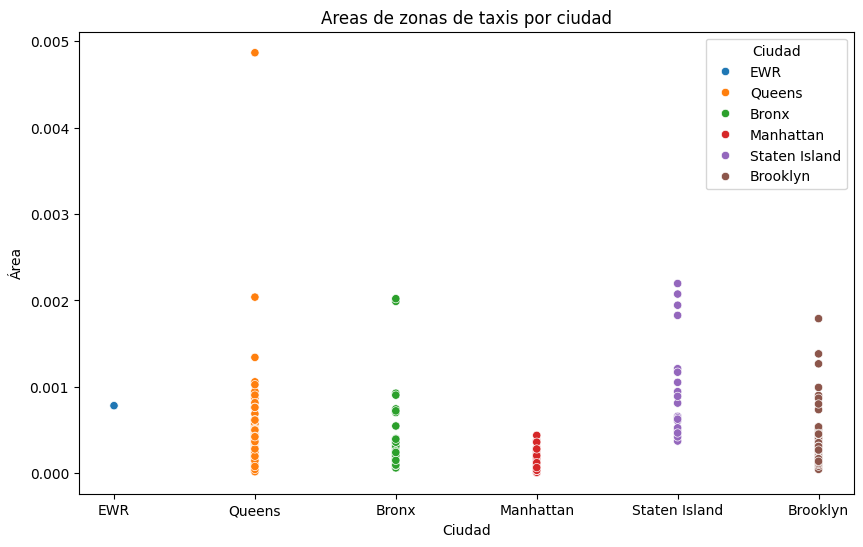

In [47]:
viajes = pd.concat([viajes_mas_largos, viajes_mas_cortos])
plt.figure(figsize=(10,6))
sns.scatterplot(x='borough', y='Shape_Area', hue='borough', data=df)
plt.title('Areas de zonas de taxis por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Área')
plt.legend(title='Ciudad')
plt.show()

- La mayor área para la zonas de taxis se da en la ciudad de Staten Islans y Queens
- La menor área para las zonas de taxis se da en la Ciudad de Manhattan


---
Zonas en aeropuertos
---
---

In [50]:
zonas_aeropuerto = df[df['zone'].str.contains('airport', case=False)]


In [51]:
zonas_aeropuerto

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
0,1,0.116357,0.000782,Newark Airport,1,EWR
131,132,0.245479,0.002038,JFK Airport,132,Queens
137,138,0.107467,0.000537,LaGuardia Airport,138,Queens


Filtrando solo existen 3 zonas de taxis que operan en Nueva York